In [1]:
import keras
import numpy as np
imdb = keras.datasets.imdb
# loading only the top 10000 words in the vocabulary like you did last week.
VOCAB_SIZE = 10000
# we reserve indices 0 for ‘<PAD>’, 1 for ‘<START>’ and 2 for ‘<UNK>’ i.e. words not in vocabulary
INDEX_FROM = 2
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
print('Sample review:', train_data[0])
# and each label is 1 if that review is positive, else 0
print('\n Sample label:', test_labels[1])


Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]

 Sample label: 1


In [3]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500


preprocessed_train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=MAXIMUM_LENGTH)

X_test_enc = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=MAXIMUM_LENGTH)
#change padding to pre

In [5]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


In [6]:
from keras import models
from keras import layers
from keras.layers import Embedding,LSTM

EMBED_SIZE = 100

model = models.Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE,output_dim=EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(units=100, activation='tanh'))   #change activation function to tanh
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
 print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


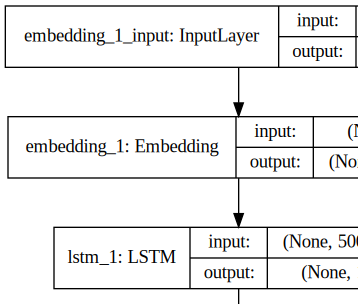

In [8]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [9]:
X_val = np.array(preprocessed_train_data[:2000])
partial_X_train = np.array(preprocessed_train_data[2000:])

y_val = np.array(train_labels[:2000])#
partial_y_train = np.array(train_labels[2000:])

print(X_val)

[[   0    0    0 ...   18  177   31]
 [   0    0    0 ...   15  144   94]
 [   0    0    0 ...    6  128  112]
 ...
 [   0    0    0 ...    8   34 2383]
 [   0    0    0 ...   60    2    2]
 [   0    0    0 ...   17    5  249]]


In [10]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    verbose=1)




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 263s 11ms/step - loss: 0.5049 - acc: 0.7427 - val_loss: 0.5348 - val_acc: 0.7175
Epoch 2/3
23000/23000 [==============================] - 262s 11ms/step - loss: 0.3186 - acc: 0.8701 - val_loss: 0.3339 - val_acc: 0.8665
Epoch 3/3
23000/23000 [==============================] - 258s 11ms/step - loss: 0.2139 - acc: 0.9212 - val_loss: 0.2949 - val_acc: 0.8845


In [11]:
results = model.evaluate(X_test_enc, test_labels)

25000/25000 [==============================] - 89s 4ms/step


In [12]:
print(results)
# loss, accuracay 

[0.32359045522689817, 0.86716]


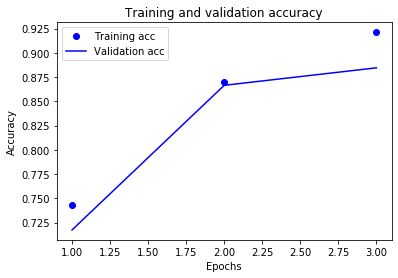

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
print('test_loss:', results[0], 'test_accuracy:', results[1])

test_loss: 0.32359045522689817 test_accuracy: 0.86716


In [0]:
#model.get_layer(Embedding).get_weights()[0]


word_embeddings = model.get_layer('embedding_1').get_weights()[0]

In [16]:
print('Shape of word_embeddings:', word_embeddings.shape)

Shape of word_embeddings: (10000, 100)


In [0]:
word2idx = imdb.get_word_index()
# 9998 since we only used top 1000 words of including ‘<PAD>’, ‘<START>’ and ‘<UNK>’
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

In [0]:
idx2word = {v:k for k, v in word2idx.items()}

In [19]:
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [20]:
 print(train_data[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


In [21]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2   ...        97        98        99
woods      0.022208 -0.038636  0.025643  ...  0.017986  0.018895  0.024624
hanging    0.057959  0.062038  0.081807  ... -0.099362 -0.113178 -0.119416
woody      0.045811 -0.030687  0.041648  ...  0.002068 -0.034982 -0.050594
arranged  -0.042068  0.003911  0.046176  ... -0.035037  0.026075  0.028303
bringing  -0.020898 -0.057030 -0.053754  ...  0.005499  0.066651  0.035232
wooden    -0.050051 -0.051960 -0.041591  ...  0.017923 -0.020598  0.027341
errors     0.013813 -0.007010 -0.013461  ... -0.033975  0.026397  0.037524
dialogs   -0.029551 -0.044040  0.044012  ...  0.029999 -0.003992  0.041580
kids      -0.034959 -0.025765  0.020378  ...  0.046411 -0.038474  0.004042
uplifting -0.000909  0.039836  0.011107  ... -0.019816 -0.030917 -0.042391

[10 rows x 100 columns]


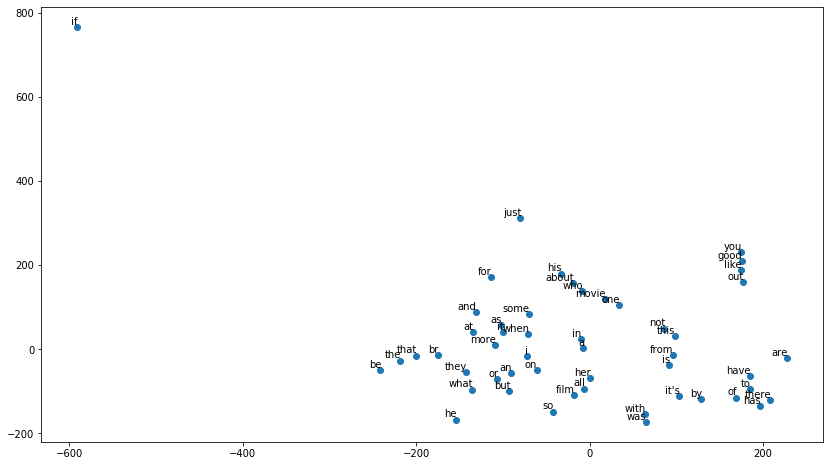

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
# starting from the first word

start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points',ha='right',va='bottom')

In [0]:
from keras.layers import Dropout


model2 = models.Sequential()
model2.add(Embedding(input_dim=VOCAB_SIZE,output_dim=EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model2.add(Dropout(1))
model2.add(LSTM(units=100, activation='tanh'))  
model2.add(Dropout(1))
model2.add(layers.Dense(1, activation='sigmoid'))



model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
 print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


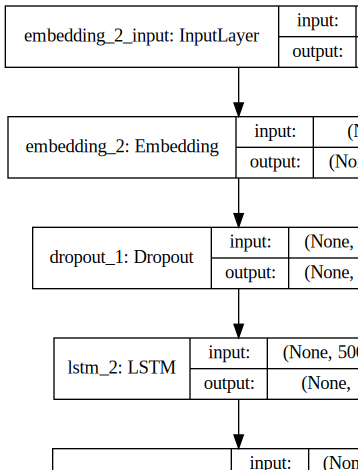

In [25]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model2, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [26]:
history = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=6,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 261s 11ms/step - loss: 0.4601 - acc: 0.7760 - val_loss: 0.3381 - val_acc: 0.8565
Epoch 2/6
23000/23000 [==============================] - 260s 11ms/step - loss: 0.2561 - acc: 0.8993 - val_loss: 0.2974 - val_acc: 0.8880
Epoch 3/6
23000/23000 [==============================] - 259s 11ms/step - loss: 0.1970 - acc: 0.9270 - val_loss: 0.2900 - val_acc: 0.8865
Epoch 4/6
23000/23000 [==============================] - 261s 11ms/step - loss: 0.1519 - acc: 0.9457 - val_loss: 0.3173 - val_acc: 0.8845
Epoch 5/6
23000/23000 [==============================] - 262s 11ms/step - loss: 0.1372 - acc: 0.9463 - val_loss: 0.5604 - val_acc: 0.7055
Epoch 6/6
23000/23000 [==============================] - 261s 11ms/step - loss: 0.1906 - acc: 0.9235 - val_loss: 0.4524 - val_acc: 0.8600


In [2]:
results = model2.evaluate(X_test_enc, test_labels)

print(results)

NameError: ignored

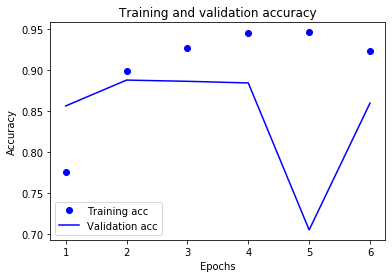

In [28]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [1]:
history = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=23000,
                    validation_data=(X_val, y_val),
                    verbose=1)

NameError: ignored